In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

In [70]:
url = "https://www.dropbox.com/scl/fi/b5zhsaqdwaejznag36egr/FullData.csv?rlkey=qx4ap4pvi4yfpqcigzi39by5h&st=w1cjyx9l&dl=1"
df = pd.read_csv(url)
print(df.columns)
df.head()
# 5 personal /5 pros
# Peronal: Name, Nationality, Club_Position,Age, Height, Weight
# Pros: Rating, Freekick_Accuracy, Penalties, Dribbling, Stamina, Skill_Moves

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')


,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

In [72]:
df['Club'].unique()

array(['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
       'Atlético Madrid', 'Bor. Dortmund', 'Spurs', 'Inter', 'Bayer 04',
       'Liverpool', 'Roma', 'Olym. Lyonnais', 'Everton',
       'Olym. Marseille', 'Napoli', 'AS Saint-Étienne', 'Athletic Bilbao',
       'Leicester City', 'AS Monaco', 'Villarreal CF', 'FC Schalke 04',
       'Crystal Palace', 'Real Sociedad', 'Milan', 'Sporting CP',
       'FC Porto', '1. FC Köln', 'Sevilla FC', 'Genoa', 'Celta Vigo',
       'Free Agents', 'Toronto FC', "Bor. M'gladbach", 'SL Benfica',
       'West Ham', 'Valencia CF', 'Fiorentina', 'Torino', 'Galatasaray',
       'Beşiktaş', 'UD Las Palmas', 'Southampton', 'Stoke City',
       'Sassuolo', 'Lazio', 'VfL Wolfsburg', 'Bournemouth',
       'Shakhtar Donetsk', 'Zenit', 'Swansea City', 'Udinese',
       'Lokomotiv Moscow', 'Sampdoria', 'Stade Rennais', 'RCD Espanyol',
       'Atalanta', 'LOSC Lille', 'Orlando City',

In [73]:
df['Nationality'].unique()

array(['Portugal', 'Argentina', 'Brazil', 'Uruguay', 'Germany', 'Spain',
       'Poland', 'Wales', 'Sweden', 'Belgium', 'Croatia', 'France',
       'Chile', 'Italy', 'Czech Republic', 'Slovenia', 'Colombia',
       'Gabon', 'Netherlands', 'Austria', 'Armenia', 'England',
       'Costa Rica', 'Denmark', 'Bosnia Herzegovina', 'Greece',
       'Slovakia', 'Algeria', 'Serbia', 'Morocco', 'Turkey',
       'Ivory Coast', 'Senegal', 'Cameroon', 'Switzerland', 'Egypt',
       'Montenegro', 'Ukraine', 'Japan', 'Iceland', 'Republic of Ireland',
       'Mexico', 'Ecuador', 'Nigeria', 'Russia', 'DR Congo', 'Finland',
       'Venezuela', 'Norway', 'United States', 'Ghana', 'Guinea',
       'New Zealand', 'Uzbekistan', 'Canada', 'Romania', 'Syria',
       'Albania', 'Korea Republic', 'Tunisia', 'Cuba', 'Kenya',
       'Northern Ireland', 'Peru', 'Paraguay', 'Australia', 'Mozambique',
       'Bulgaria', 'Hungary', 'Scotland', 'Estonia', 'Angola', 'Iran',
       'Cape Verde', 'Georgia', 'Burkina Faso'

In [74]:
# Selecting specific columns
selected_columns = ['Name', 'Nationality', 'Club_Position', 'Age', 'Height', 'Weight',
                    'Rating', 'Freekick_Accuracy', 'Dribbling', 'Speed', 'Stamina','Skill_Moves']

# Creating a new DataFrame with only the selected columns
filtered_df = df[selected_columns]

# Display the first few rows of the new DataFrame to verify it looks correct
print(filtered_df.head())
# New columns

                Name Nationality Club_Position  Age  Height Weight  Rating  \
0  Cristiano Ronaldo    Portugal            LW   32  185 cm  80 kg      94   
1       Lionel Messi   Argentina            RW   29  170 cm  72 kg      93   
2             Neymar      Brazil            LW   25  174 cm  68 kg      92   
3        Luis Suárez     Uruguay            ST   30  182 cm  85 kg      92   
4       Manuel Neuer     Germany            GK   31  193 cm  92 kg      92   

   Freekick_Accuracy  Dribbling  Speed  Stamina  Skill_Moves  
0                 76         92     92       92            5  
1                 90         97     87       74            4  
2                 84         96     90       79            5  
3                 84         86     77       89            4  
4                 11         30     61       44            1  


In [75]:
# Convert Height to numeric (removing ' cm')
if filtered_df['Height'].dtype ==object and 'cm' in filtered_df['Height'].iloc[0]:
  filtered_df['Height'] = filtered_df['Height'].str.replace(' cm', '').astype(int)
if filtered_df['Weight'].dtype ==object and 'kg' in filtered_df['Weight'].iloc[0]:
# Convert Weight to numeric (removing ' kg')
  filtered_df['Weight'] = filtered_df['Weight'].str.replace(' kg', '').astype(int)

# Display the cleaned DataFrame
print(filtered_df['Club_Position'].value_counts())


Club_Position
Sub    7492
Res    3146
RCB     633
GK      632
LCB     631
LB      549
RB      548
ST      426
LM      414
RM      414
LCM     354
RCM     353
CAM     315
RDM     266
LDM     266
RS      206
LS      205
LW      133
RW      133
CDM     119
CB       83
CM       79
RWB      45
LWB      45
LAM      36
RAM      36
LF       12
RF       12
CF        4
Name: count, dtype: int64


<ipython-input-75-7f37afa3c725>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Height'] = filtered_df['Height'].str.replace(' cm', '').astype(int)
<ipython-input-75-7f37afa3c725>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Weight'] = filtered_df['Weight'].str.replace(' kg', '').astype(int)


In [76]:
# Categories? GoalKeeper GK, Defender RCB LCB LB RB CB RWB LWB , Midfielder LM RM LCM RCM CAM RDM LDM CDM CM LAM RAM and Forward ST RS LS LW RW LF RF CF
# Sub, Res
# Field_Pos to reflect this DIrectories : key/Value
position_categories = {
    'GK': 'Goalkeeper',
    'RCB': 'Defender', 'LCB': 'Defender', 'LB': 'Defender', 'RB': 'Defender',
    'CB': 'Defender', 'RWB': 'Defender', 'LWB': 'Defender',
    'LM': 'Midfielder', 'RM': 'Midfielder', 'LCM': 'Midfielder', 'RCM': 'Midfielder',
    'CAM': 'Midfielder', 'RDM': 'Midfielder', 'LDM': 'Midfielder', 'CDM': 'Midfielder', 'CM': 'Midfielder',
    'LAM': 'Midfielder', 'RAM': 'Midfielder',
    'ST': 'Forward', 'RS': 'Forward', 'LS': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'LF': 'Forward', 'RF': 'Forward', 'CF': 'Forward',
    'Sub': 'Substitute', 'Res': 'Reserve'
    # substitute -> on the courtside
    # reserve -> not playing at all
}

# Adding the club_pos
if 'Field_Pos' not in filtered_df.columns:
    filtered_df.insert(loc=filtered_df.columns.get_loc('Club_Position') + 1, column='Field_Pos', value=filtered_df['Club_Position'].map(position_categories))
else:
    filtered_df.loc[:, 'Field_Pos'] = filtered_df['Club_Position'].map(position_categories)

print(filtered_df.columns)
filtered_df.head()

Index(['Name', 'Nationality', 'Club_Position', 'Field_Pos', 'Age', 'Height',
       'Weight', 'Rating', 'Freekick_Accuracy', 'Dribbling', 'Speed',
       'Stamina', 'Skill_Moves'],
      dtype='object')


,Name,Nationality,Club_Position,Field_Pos,Age,Height,Weight,Rating,Freekick_Accuracy,Dribbling,Speed,Stamina,Skill_Moves
0,Cristiano Ronaldo,Portugal,LW,Forward,32,185,80,94,76,92,92,92,5
1,Lionel Messi,Argentina,RW,Forward,29,170,72,93,90,97,87,74,4
2,Neymar,Brazil,LW,Forward,25,174,68,92,84,96,90,79,5
3,Luis Suárez,Uruguay,ST,Forward,30,182,85,92,84,86,77,89,4
4,Manuel Neuer,Germany,GK,Goalkeeper,31,193,92,92,11,30,61,44,1


In [77]:
# Get top player from each position?
# Sort by 'Field_Pos' and 'Rating'
sorted_df = filtered_df.sort_values(by=['Field_Pos', 'Rating'], ascending=[True, False])
# print(sorted_df)
# Group by 'Field_Pos' and get the top 10 players in each group
top_players = sorted_df.groupby('Field_Pos').head(10)

top_players = top_players.set_index('Name')
top_players['Rank'] = top_players.groupby('Field_Pos').cumcount() + 1

# Reorder columns to show Rank first if needed
cols = ['Rank'] + [col for col in top_players.columns if col != 'Rank']
top_players = top_players[cols]
# Display the result
top_players
# print(top_players)

,Rank,Nationality,Club_Position,Field_Pos,Age,Height,Weight,Rating,Freekick_Accuracy,Dribbling,Speed,Stamina,Skill_Moves
Name,,,,,,,,,,,,,
Thiago Silva,1,Brazil,LCB,Defender,32,183,79,89,73,68,76,74,3
Sergio Ramos,2,Spain,LCB,Defender,31,183,75,89,67,61,78,84,3
Diego Godín,3,Uruguay,LCB,Defender,31,185,73,88,51,53,67,69,2
Mats Hummels,4,Germany,LCB,Defender,28,191,92,88,53,68,65,66,2
Giorgio Chiellini,5,Italy,LCB,Defender,32,187,84,88,31,56,79,69,2
Philipp Lahm,6,Germany,RB,Defender,33,170,66,88,59,82,67,79,3
Pepe,7,Portugal,RCB,Defender,34,188,81,88,47,58,75,64,2
Leonardo Bonucci,8,Italy,RCB,Defender,29,190,85,87,61,68,75,73,2
Piqué,9,Spain,RCB,Defender,30,193,85,87,43,59,73,69,2


In [78]:
pip install requests beautifulsoup4


In [79]:
import requests
from bs4 import BeautifulSoup
import re

In [80]:
# Getting data from web scrapping of Capology (API cost money :<)
players_categories = {
    "Thiago Silva": "30947", "Sergio Ramos": "31501", "Diego Godín": "31459", "Mats Hummels": "32493", "Giorgio Chiellini": "30908",
    "Philipp Lahm": "30631", "Pepe": "30373", "Leonardo Bonucci": "31898", "Piqué": "31810", "David Alaba": "33779",
    "Cristiano Ronaldo": "31083", "Lionel Messi": "31952", "Neymar": "33639", "Luis Suárez": "31801", "Robert Lewandowski": "32376",
    "Gareth Bale": "32705", "Zlatan Ibrahimović": "29862", "Eden Hazard": "33245", "Gonzalo Higuaín": "32121", "Sergio Agüero": "32296",
    "Manuel Neuer": "31498", "De Gea": "33184", "Thibaut Courtois": "33735", "Hugo Lloris": "31772", "Petr Čech": "30091",
    "Gianluigi Buffon": "28518", "Jan Oblak": "33976", "Samir Handanovič": "30877", "Bernd Leno": "33667", "Keylor Navas": "31761",
    "Luka Modrić": "31299", "Mesut Özil": "32431", "Paul Pogba": "34043", "Kevin De Bruyne": "33417", "Toni Kroos": "32877",
    "Iniesta": "30813", "James Rodríguez": "33431", "Arturo Vidal": "31919", "Ivan Rakitić": "32212", "David Silva": "31420",
    "Mattia Perin": "33918", "Giacomo Bonaventura": "32742", "Oscar": "33490", "Axel Witsel": "32520", "Kaká": "30063",
    "Paulinho": "31422", "Martín Cáceres": "31874", "Benoît Trémoulinas": "31409", "Sven Bender": "32625", "Renato Augusto": "32181",
    "Jérôme Boateng": "32389", "Claudio Marchisio": "31431", "Cesc Fàbregas": "31901", "Franck Ribéry": "30413", "Santi Cazorla": "31029",
    "Andrea Barzagli": "29714", "İlkay Gündoğan": "33170", "Willian": "31735", "Juan Mata": "32261", "Vincent Kompany": "31512"
}
# Example of link Jérôme Boateng => https://www.capology.com/player/jerome-boateng-32389
# Return Adjusted Money at <span class="adjusted-gross-usd player-details" style="display: none">$ 106,085,489</span>
# Troubling player link : Pique -> GERARD PIQUÉ
# De Gea -> David De Gea
# Iniesta -> andres Iniesta
# NULL data for James Rodríguez | Renato Augusto | Santi Cazorla | => get mean to replace

# Function to scrape adjusted money from a player's page
# Custom mapping for special case players
special_case_mapping = {
    "Piqué": "gerard-pique",
    "De Gea": "david-de-gea",
    "Iniesta": "andres-iniesta"
}
# Working
# Function to get the player URL considering special cases
def get_player_url(player_name, player_id):
    player_name_formatted = special_case_mapping.get(player_name, player_name.lower().replace(' ', '-'))
    return f"https://www.capology.com/player/{player_name_formatted}-{player_id}"
# url = get_player_url('Thiago Silva',35228)
# print(url)
# requests.get(url)
# response = requests.get(url)
# print(response)
# soup = BeautifulSoup(response.content, 'html.parser')
# print(soup.prettify())
# adjusted_money = soup.select('span.annual-gross-eur').get_html()
# print(adjusted_money)
#$('span.annual-total-gross-usd').html(accounting.formatMoney("53307", "$ ", 0)+" per year");
# Extract the relevant JavaScript content
# script_tags = soup.find_all('script')
# for script in script_tags:
#     if 'accounting.formatMoney' in script.text:
#         js_content = script.text
#         break

# # Extract the money value using regex
# money_match = re.search(r'accounting\.formatMoney\("(\d+)", "\€ ", 0\)', js_content)
# if money_match:
#     adjusted_money = money_match.group(1)
#     print(f"Adjusted Money: € {adjusted_money}")
# else:
    # print("Adjusted money not found.")
# Not working yet
# Modified get_adjusted_money function to use the special case mapping
# Function to scrape adjusted money from a player's page
def get_adjusted_money(player_name, player_id):
    url = get_player_url(player_name, player_id)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    js_content = None
    script_tags = soup.find_all('script')
    for script in script_tags:
        if 'accounting.formatMoney' in script.text:
            js_content = script.text
            break

    if js_content:
        # Extract the adjusted amount using regex
        money_match = re.search(r'accounting\.formatMoney\("(\d+)", "\$ ", 0\)', js_content)
        if money_match:
            adjusted_money = money_match.group(1)
            return adjusted_money
    return None

# Dictionary to store adjusted money values
adjusted_money_dict = {}

# Scrape adjusted money for each player
for player, player_id in players_categories.items():
    adjusted_money = get_adjusted_money(player, player_id)
    adjusted_money_dict[player] = adjusted_money
    # print(f"{player}: {adjusted_money}")
# Convert the adjusted_money_dict to a DataFrame
adjusted_money_df = pd.DataFrame.from_dict(adjusted_money_dict, orient='index', columns=['adjusted_money'])

# Merge the adjusted_money_df with the top_players DataFrame
top_players = top_players.join(adjusted_money_df)

# Display the updated DataFrame
print(top_players)

                     Rank     Nationality Club_Position   Field_Pos  Age  \
Name                                                                       
Thiago Silva            1          Brazil           LCB    Defender   32   
Sergio Ramos            2           Spain           LCB    Defender   31   
Diego Godín             3         Uruguay           LCB    Defender   31   
Mats Hummels            4         Germany           LCB    Defender   28   
Giorgio Chiellini       5           Italy           LCB    Defender   32   
Philipp Lahm            6         Germany            RB    Defender   33   
Pepe                    7        Portugal           RCB    Defender   34   
Leonardo Bonucci        8           Italy           RCB    Defender   29   
Piqué                   9           Spain           RCB    Defender   30   
David Alaba            10         Austria            LB    Defender   24   
Cristiano Ronaldo       1        Portugal            LW     Forward   32   
Lionel Messi

In [81]:
outdated_players_categories = {
    'Diego Godín': 7533017,
    'Luis Suárez': 35740330,
    'Zlatan Ibrahimović': 4254511,
    'Gonzalo Higuaín': 16323495,
    'Sergio Agüero': 16406748,
    'Petr Čech': 7917728,
    'Samir Handanovič': 6968922,
    'Luka Modrić': 23327239,
    'Mesut Özil': 24945933,
    'James Rodríguez': 10600000,
    'Ivan Rakitić': 20410000,
    'Kaká': 7951555,
    'Martín Cáceres': 500004,
    'Benoît Trémoulinas': 2042604,
    'Jérôme Boateng': 740000,
    'Cesc Fàbregas': 8209774,
    'Franck Ribéry': 6028764,
    'Santi Cazorla': 3640000,
    'İlkay Gündoğan': 18750000,
    'Andrea Barzagli': 6525101,
    'Paul Pogba': 10938462,
    'Willian': 1051613,
    'Lionel Messi': 60000000,
}
# Update the adjusted_money column in top_players with values from outdated_players_categories
for player, adjusted_money in outdated_players_categories.items():
    if player in top_players.index:
        top_players.at[player, 'adjusted_money'] = adjusted_money
# Format the adjusted_money column to show values with commas
# Function to check if the value is already formatted
# Define the is_formatted function
def is_formatted(value):
    return isinstance(value, str) and ',' in value

# Convert all values to integers
top_players['adjusted_money'] = top_players['adjusted_money'].apply(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)

# Creating a new formatted column for printing or displaying
top_players['formatted_money'] = top_players['adjusted_money'].apply(lambda x: f"{x:,}" if pd.notnull(x) else x)

# Display the updated DataFrame
print(top_players)


                     Rank     Nationality Club_Position   Field_Pos  Age  \
Name                                                                       
Thiago Silva            1          Brazil           LCB    Defender   32   
Sergio Ramos            2           Spain           LCB    Defender   31   
Diego Godín             3         Uruguay           LCB    Defender   31   
Mats Hummels            4         Germany           LCB    Defender   28   
Giorgio Chiellini       5           Italy           LCB    Defender   32   
Philipp Lahm            6         Germany            RB    Defender   33   
Pepe                    7        Portugal           RCB    Defender   34   
Leonardo Bonucci        8           Italy           RCB    Defender   29   
Piqué                   9           Spain           RCB    Defender   30   
David Alaba            10         Austria            LB    Defender   24   
Cristiano Ronaldo       1        Portugal            LW     Forward   32   
Lionel Messi

<ipython-input-82-93cb6afa4ca6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(top_players, x='Age', y='Field_Pos', inner='stick', palette='Dark2')


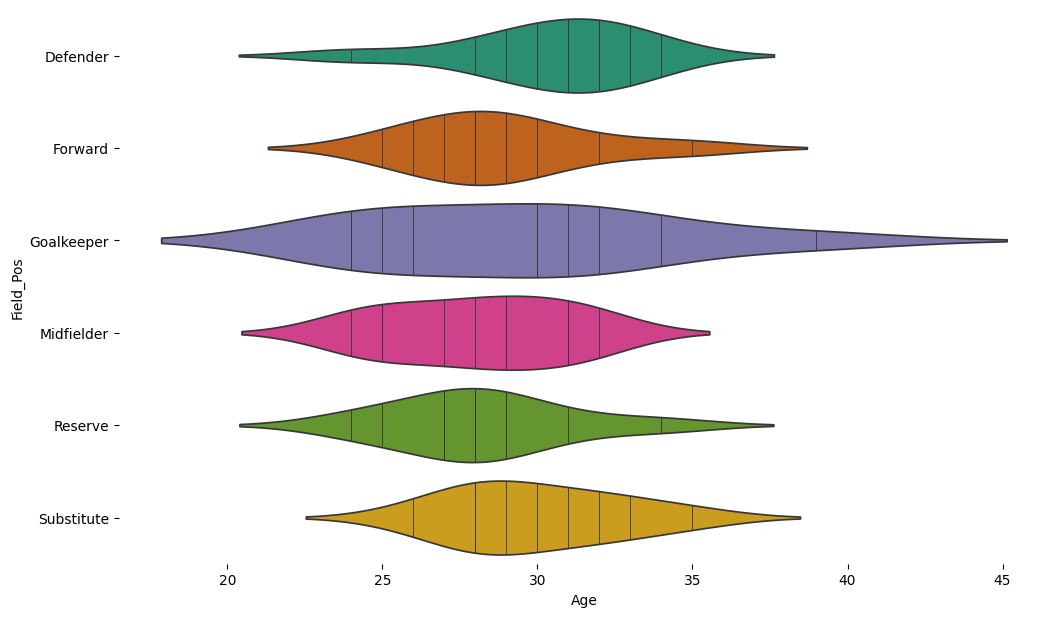

In [82]:
# @title Field_Pos vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_players['Field_Pos'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_players, x='Age', y='Field_Pos', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [83]:
top_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Thiago Silva to Vincent Kompany
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               60 non-null     int64 
 1   Nationality        60 non-null     object
 2   Club_Position      60 non-null     object
 3   Field_Pos          60 non-null     object
 4   Age                60 non-null     int64 
 5   Height             60 non-null     int64 
 6   Weight             60 non-null     int64 
 7   Rating             60 non-null     int64 
 8   Freekick_Accuracy  60 non-null     int64 
 9   Dribbling          60 non-null     int64 
 10  Speed              60 non-null     int64 
 11  Stamina            60 non-null     int64 
 12  Skill_Moves        60 non-null     int64 
 13  adjusted_money     60 non-null     int64 
 14  formatted_money    60 non-null     object
dtypes: int64(11), object(4)
memory usage: 9.6+ KB


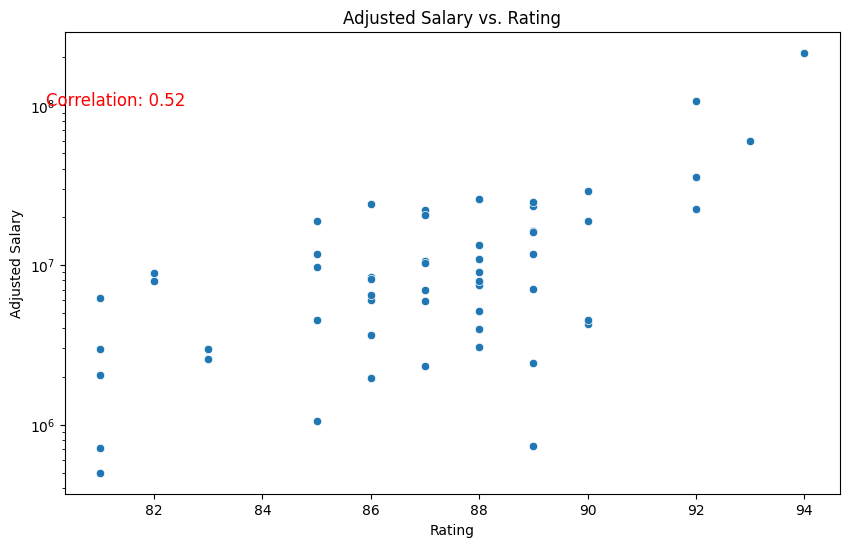

In [84]:
import seaborn as sns

# Calculate the correlation coefficient
correlation = top_players['Rating'].corr(top_players['adjusted_money'])

# Create a scatter plot with log scale for y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='adjusted_money', data=top_players)

# Set titles and labels
plt.title('Adjusted Salary vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Adjusted Salary')
plt.yscale('log')

# Add correlation coefficient to the plot
plt.text(80, 1e8, f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Show the plot
plt.show()


In [85]:
# Dream team
# 1 goalkeeper, 3 defenders, 4 midfielder, 3 forwards, 3 subtitute

# Goalkeeper
goalkeepers = filtered_df[filtered_df['Field_Pos']=='Goalkeeper']
sorted_goalkeepers = goalkeepers.sort_values('Rating', ascending=False)
highest_rated_goalkeeper_name = sorted_goalkeepers['Name'].iloc[0]

# Defenders
defenders = filtered_df[filtered_df['Field_Pos']=='Defender']
sorted_defenders = defenders.sort_values('Rating', ascending=False)
highest_rated_defenders_names = sorted_defenders['Name'].iloc[0:3].tolist()

# Midfielders
midfielders = filtered_df[filtered_df['Field_Pos']=='Midfielder']
sorted_midfielders = midfielders.sort_values('Rating', ascending=False)
highest_rated_midfielders_names = sorted_midfielders['Name'].iloc[0:4].tolist()

# Forwards
forwards = filtered_df[filtered_df['Field_Pos']=='Forward']
sorted_forwards = forwards.sort_values('Rating', ascending=False)
highest_rated_forwards_names = sorted_forwards['Name'].iloc[0:3].tolist()

# Dream team value
dream_team_names = [highest_rated_goalkeeper_name] + highest_rated_defenders_names + highest_rated_midfielders_names + highest_rated_forwards_names
dream_team_df = top_players.loc[dream_team_names]
total_value = dream_team_df['adjusted_money'].sum()

# Printing dream team
print('The team of the year is: \n')
print(f'Goalkeeper: {highest_rated_goalkeeper_name}')
print(f'Defenders: {highest_rated_defenders_names[0]}, {highest_rated_defenders_names[1]}, and {highest_rated_defenders_names[2]}')
print(f'Midfielders: {highest_rated_midfielders_names[0]}, {highest_rated_midfielders_names[1]}, {highest_rated_midfielders_names[2]}, and {highest_rated_midfielders_names[3]}')
print(f'Forwards: {highest_rated_forwards_names[0]}, {highest_rated_forwards_names[1]}, and {highest_rated_forwards_names[2]}')
print(f'\nThe total adjusted salary value of the dream team is: ${total_value:,}')

The team of the year is: 

Goalkeeper: Manuel Neuer
Defenders: Thiago Silva, Sergio Ramos, and Diego Godín
Midfielders: Luka Modrić, Mesut Özil, Paul Pogba, and Kevin De Bruyne
Forwards: Cristiano Ronaldo, Lionel Messi, and Neymar

The total adjusted salary value of the dream team is: $504,272,606


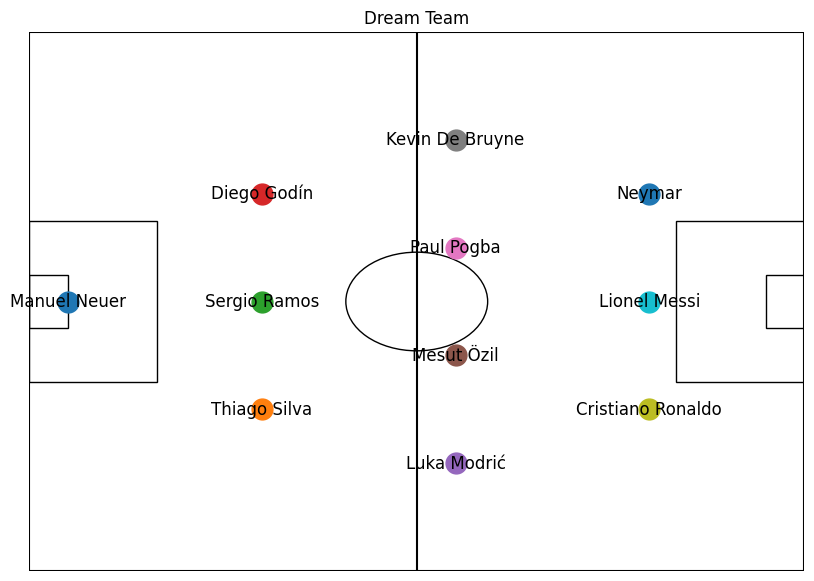

In [86]:
import matplotlib.patches as patches

# Define the formation and player names
formation = {
    'GK': ['Manuel Neuer'],
    'DEF': ['Thiago Silva', 'Sergio Ramos', 'Diego Godín'],
    'MID': ['Luka Modrić', 'Mesut Özil', 'Paul Pogba', 'Kevin De Bruyne'],
    'FOR': ['Cristiano Ronaldo', 'Lionel Messi', 'Neymar']
}
# Coordinates for the players on the field in a 3-4-3 formation
positions = {
    'GK': [(5, 50)],
    'DEF': [(30, 30), (30, 50), (30, 70)],
    'MID': [(55, 20), (55, 40), (55, 60), (55, 80)],
    'FOR': [(80, 30), (80, 50), (80, 70)]
}
# Create the field
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot([0, 100], [0, 0], color='black')
plt.plot([0, 100], [100, 100], color='black')
plt.plot([0, 0], [0, 100], color='black')
plt.plot([100, 100], [0, 100], color='black')
plt.plot([50, 50], [0, 100], color='black')
# Add the goals
goal_left = patches.Rectangle((0, 45), 5, 10, linewidth=1, edgecolor='black', facecolor='none')
goal_right = patches.Rectangle((95, 45), 5, 10, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(goal_left)
ax.add_patch(goal_right)
# Add the penalty areas
penalty_left = patches.Rectangle((0, 35), 16.5, 30, linewidth=1, edgecolor='black', facecolor='none')
penalty_right = patches.Rectangle((83.5, 35), 16.5, 30, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(penalty_left)
ax.add_patch(penalty_right)
# Add the center circle
center_circle = patches.Circle((50, 50), 9.15, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(center_circle)
# Plot the players
for role, player_names in formation.items():
    for i, player_name in enumerate(player_names):
        x, y = positions[role][i]
        plt.plot(x, y, 'o', markersize=15, label=player_name)
        plt.text(x, y, player_name, fontsize=12, ha='center', va='center')
# Style the plot
plt.title('Dream Team')
plt.axis('off')  # Hide the axes
plt.xlim(0, 100)
plt.ylim(0, 100)
# Show the plot
plt.show()

In [87]:
# Countries with the most players in the top 500
top_500_players = filtered_df.sort_values('Rating', ascending=False).head(500)
top_500_players['Nationality'].value_counts()

Nationality
Spain                  74
France                 50
Germany                45
Brazil                 40
Italy                  39
England                33
Argentina              27
Portugal               21
Belgium                16
Netherlands            14
Croatia                11
Mexico                  8
Switzerland             7
Serbia                  7
Ivory Coast             7
Russia                  6
Chile                   6
Poland                  6
Uruguay                 6
Denmark                 5
Senegal                 4
Algeria                 4
Bosnia Herzegovina      4
Morocco                 4
Greece                  4
Colombia                4
Wales                   3
Sweden                  3
Ukraine                 3
Ghana                   3
Turkey                  3
Slovenia                3
Cameroon                3
Montenegro              2
Slovakia                2
Republic of Ireland     2
Ecuador                 2
Austria                 2


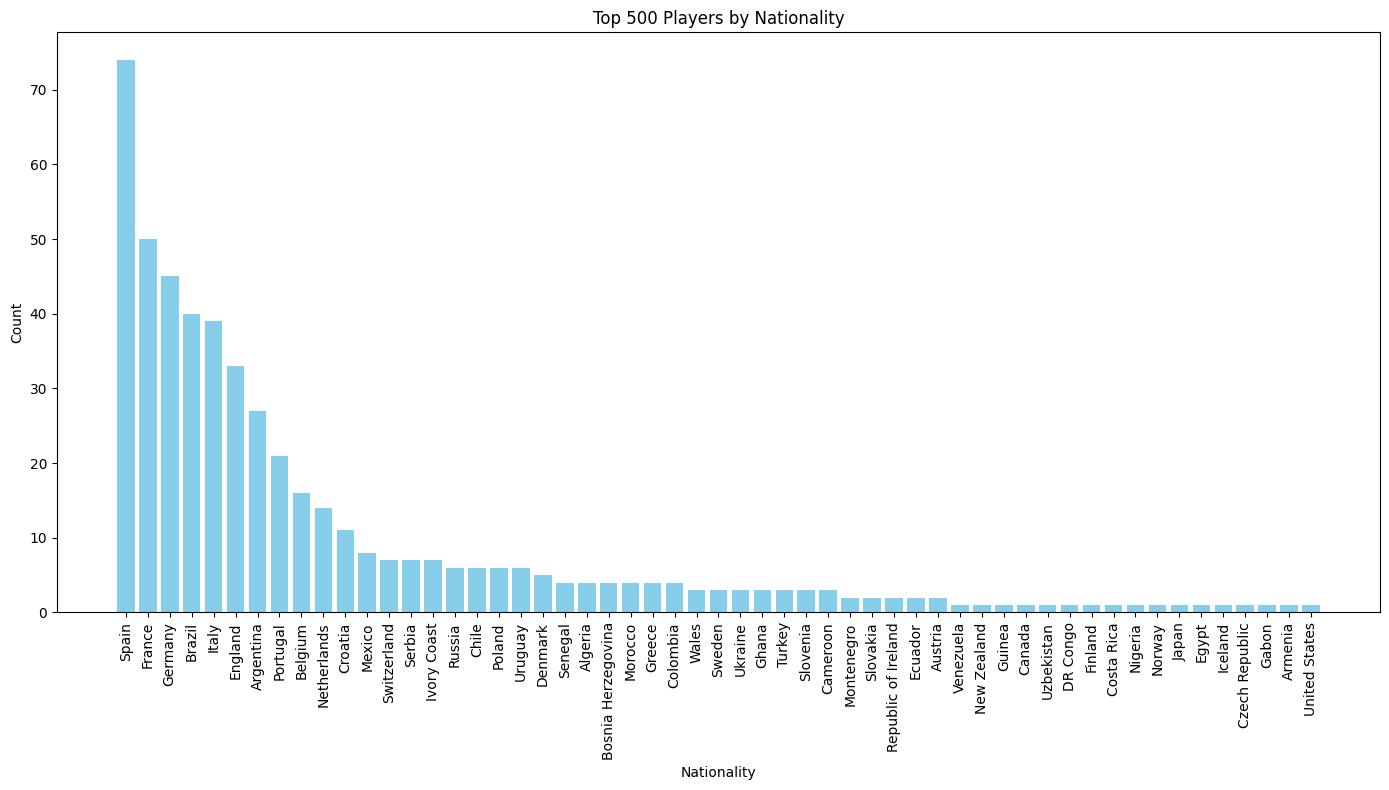

In [88]:
nationality_counts = {
    "Spain": 74, "France": 50, "Germany": 45, "Brazil": 40, "Italy": 39,
    "England": 33, "Argentina": 27, "Portugal": 21, "Belgium": 16,
    "Netherlands": 14, "Croatia": 11, "Mexico": 8, "Switzerland": 7,
    "Serbia": 7, "Ivory Coast": 7, "Russia": 6, "Chile": 6, "Poland": 6,
    "Uruguay": 6, "Denmark": 5, "Senegal": 4, "Algeria": 4,
    "Bosnia Herzegovina": 4, "Morocco": 4, "Greece": 4, "Colombia": 4,
    "Wales": 3, "Sweden": 3, "Ukraine": 3, "Ghana": 3, "Turkey": 3,
    "Slovenia": 3, "Cameroon": 3, "Montenegro": 2, "Slovakia": 2,
    "Republic of Ireland": 2, "Ecuador": 2, "Austria": 2, "Venezuela": 1,
    "New Zealand": 1, "Guinea": 1, "Canada": 1, "Uzbekistan": 1,
    "DR Congo": 1, "Finland": 1, "Costa Rica": 1, "Nigeria": 1,
    "Norway": 1, "Japan": 1, "Egypt": 1, "Iceland": 1, "Czech Republic": 1,
    "Gabon": 1, "Armenia": 1, "United States": 1
}
# Sort the data by values in descending order for better visualization
nationality_counts = dict(sorted(nationality_counts.items(), key=lambda item: item[1], reverse=True))
# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(nationality_counts.keys(), nationality_counts.values(), color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Top 500 Players by Nationality')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Show the plot
plt.show()

In [89]:
country_to_continent = {
    'Portugal': 'Europe',
    'Argentina': 'South America',
    'Brazil': 'South America',
    'Uruguay': 'South America',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Wales': 'Europe',
    'Sweden': 'Europe',
    'Belgium': 'Europe',
    'Croatia': 'Europe',
    'France': 'Europe',
    'Chile': 'South America',
    'Italy': 'Europe',
    'Czech Republic': 'Europe',
    'Slovenia': 'Europe',
    'Colombia': 'South America',
    'Gabon': 'Africa',
    'Netherlands': 'Europe',
    'Austria': 'Europe',
    'Armenia': 'Asia',
    'England': 'Europe',
    'Costa Rica': 'North America',
    'Denmark': 'Europe',
    'Bosnia Herzegovina': 'Europe',
    'Greece': 'Europe',
    'Slovakia': 'Europe',
    'Algeria': 'Africa',
    'Serbia': 'Europe',
    'Morocco': 'Africa',
    'Turkey': 'Asia/Europe',
    'Ivory Coast': 'Africa',
    'Senegal': 'Africa',
    'Cameroon': 'Africa',
    'Switzerland': 'Europe',
    'Egypt': 'Africa',
    'Montenegro': 'Europe',
    'Ukraine': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Republic of Ireland': 'Europe',
    'Mexico': 'North America',
    'Ecuador': 'South America',
    'Nigeria': 'Africa',
    'Russia': 'Asia/Europe',
    'DR Congo': 'Africa',
    'Finland': 'Europe',
    'Venezuela': 'South America',
    'Norway': 'Europe',
    'United States': 'North America',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'New Zealand': 'Oceania',
    'Uzbekistan': 'Asia',
    'Canada': 'North America',
    'Romania': 'Europe',
    'Syria': 'Asia',
    'Albania': 'Europe',
    'Korea Republic': 'Asia',
    'Tunisia': 'Africa',
    'Cuba': 'North America',
    'Kenya': 'Africa',
    'Northern Ireland': 'Europe',
    'Peru': 'South America',
    'Paraguay': 'South America',
    'Australia': 'Oceania',
    'Mozambique': 'Africa',
    'Bulgaria': 'Europe',
    'Hungary': 'Europe',
    'Scotland': 'Europe',
    'Estonia': 'Europe',
    'Angola': 'Africa',
    'Iran': 'Asia',
    'Cape Verde': 'Africa',
    'Georgia': 'Asia/Europe',
    'Burkina Faso': 'Africa',
    'South Africa': 'Africa',
    'Lithuania': 'Europe',
    'Jamaica': 'North America',
    'Togo': 'Africa',
    'Mali': 'Africa',
    'Israel': 'Asia',
    'Bolivia': 'South America',
    'Benin': 'Africa',
    'Guinea Bissau': 'Africa',
    'Zimbabwe': 'Africa',
    'Moldova': 'Europe',
    'Sierra Leone': 'Africa',
    'Belarus': 'Europe',
    'Chad': 'Africa',
    'Gambia': 'Africa',
    'Kosovo': 'Europe',
    'Dominican Republic': 'North America',
    'Saudi Arabia': 'Asia',
    'São Tomé & Príncipe': 'Africa',
    'Congo': 'Africa',
    'Honduras': 'North America',
    'Curacao': 'North America',
    'Haiti': 'North America',
    'FYR Macedonia': 'Europe',
    'Cyprus': 'Europe',
    'Iraq': 'Asia',
    'Tanzania': 'Africa',
    'Guatemala': 'North America',
    'Zambia': 'Africa',
    'Latvia': 'Europe',
    'Niger': 'Africa',
    'Panama': 'North America',
    'Luxembourg': 'Europe',
    'Azerbaijan': 'Asia',
    'Liechtenstein': 'Europe',
    'Madagascar': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Kuwait': 'Asia',
    'Palestine': 'Asia',
    'Uganda': 'Africa',
    'Bermuda': 'North America',
    'Suriname': 'South America',
    'Comoros': 'Africa',
    'Central African Rep.': 'Africa',
    'Eritrea': 'Africa',
    'Oman': 'Asia',
    'El Salvador': 'North America',
    'Libya': 'Africa',
    'St Kitts Nevis': 'North America',
    'Trinidad & Tobago': 'North America',
    'Mauritania': 'Africa',
    'Qatar': 'Asia',
    'China PR': 'Asia',
    'Kazakhstan': 'Asia',
    'Aruba': 'North America',
    'Guam': 'Oceania',
    'Malta': 'Europe',
    'Guyana': 'South America',
    'Philippines': 'Asia',
    'Mauritius': 'Africa',
    'Chinese Taipei': 'Asia',
    'Fiji': 'Oceania',
    'India': 'Asia',
    'Barbados': 'North America',
    'Faroe Islands': 'Europe',
    'Liberia': 'Africa',
    'Montserrat': 'North America',
    'Puerto Rico': 'North America',
    'Antigua & Barbuda': 'North America',
    'Belize': 'North America',
    'Lebanon': 'Asia',
    'Korea DPR': 'Asia',
    'Somalia': 'Africa',
    'Gibraltar': 'Europe',
    'Grenada': 'North America',
    'Timor-Leste': 'Asia',
    'St Lucia': 'North America',
    'Lesotho': 'Africa',
    'Papua New Guinea': 'Oceania',
    'Namibia': 'Africa',
    'Pakistan': 'Asia',
    'Afghanistan': 'Asia',
    'San Marino': 'Europe'
}

# Add the 'Continent' column using the mapping dictionary
filtered_df['Continent'] = filtered_df['Nationality'].map(country_to_continent)

filtered_df['Continent'].value_counts()

<ipython-input-89-0fc0891c4e08>:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Continent'] = filtered_df['Nationality'].map(country_to_continent)


Continent
Europe           9961
South America    3383
Asia             1285
Africa           1175
North America     886
Asia/Europe       629
Oceania           267
Name: count, dtype: int64

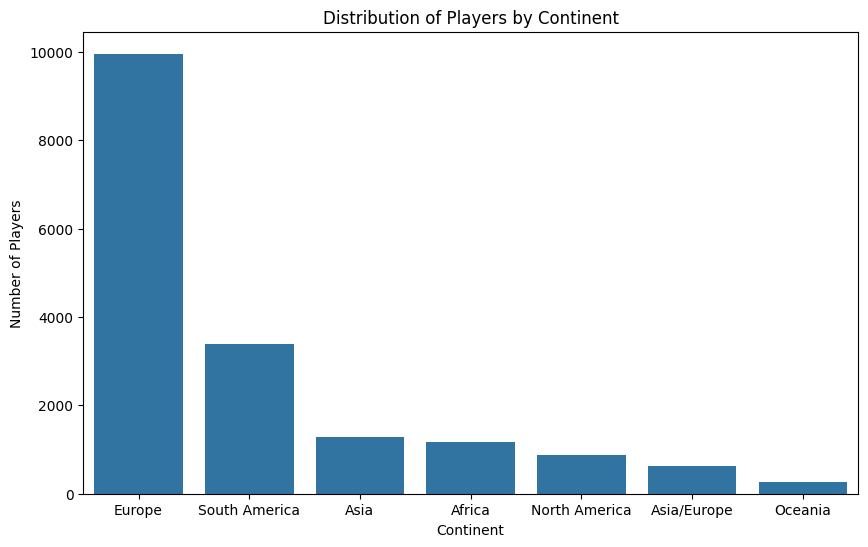

In [90]:
# Calculate the number of players from each continent
continent_counts = filtered_df['Continent'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_counts.index, y=continent_counts.values)

# Set titles and labels
plt.title('Distribution of Players by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Players')

# Show the plot
plt.show()

In [91]:
# Clubs with the most players in the top 100
top_100 = df.sort_values('Rating', ascending=False).head(100)
top_100['Club'].value_counts()

Club
FC Bayern           12
Juventus            11
Real Madrid         10
FC Barcelona         9
Manchester City      6
Chelsea              6
Manchester Utd       5
PSG                  5
Arsenal              5
Atlético Madrid      4
Inter                4
Spurs                4
Bor. Dortmund        3
Roma                 2
Napoli               2
Villarreal CF        2
FC Schalke 04        2
Liverpool            1
Bayer 04             1
AS Saint-Étienne     1
Olym. Marseille      1
Olym. Lyonnais       1
Everton              1
Crystal Palace       1
Athletic Bilbao      1
Name: count, dtype: int64

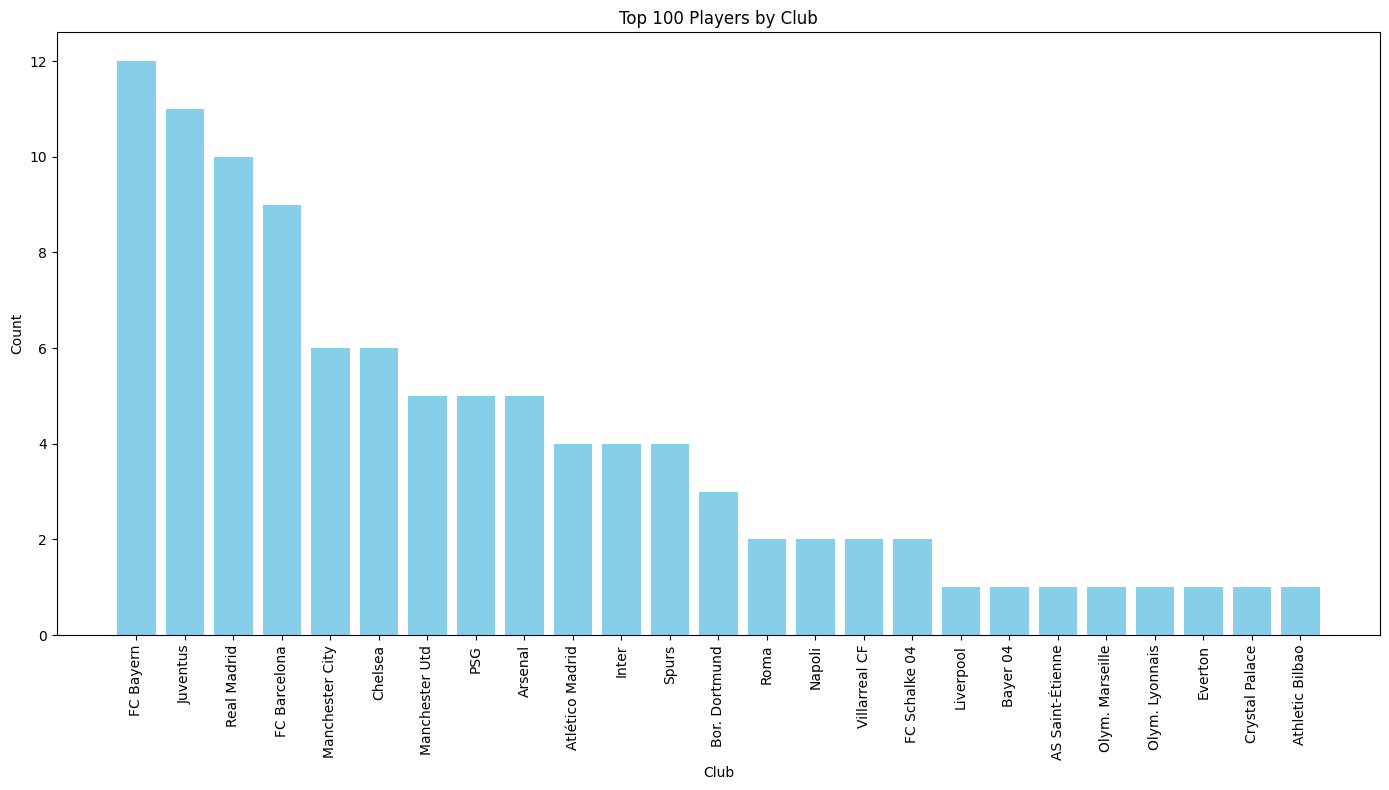

In [92]:
top_100_players_by_team = {
    'Club': [
        'FC Bayern', 'Juventus', 'Real Madrid', 'FC Barcelona', 'Manchester City',
        'Chelsea', 'Manchester Utd', 'PSG', 'Arsenal', 'Atlético Madrid',
        'Inter', 'Spurs', 'Bor. Dortmund', 'Roma', 'Napoli', 'Villarreal CF',
        'FC Schalke 04', 'Liverpool', 'Bayer 04', 'AS Saint-Étienne',
        'Olym. Marseille', 'Olym. Lyonnais', 'Everton', 'Crystal Palace',
        'Athletic Bilbao'
    ],
    'Count': [
        12, 11, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1
    ]
}
top_100_clubs = pd.DataFrame(top_100_players_by_team)
# Sort the DataFrame by 'Count' in descending order for better visualization
top_100_clubs = top_100_clubs.sort_values(by='Count', ascending=False)
# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(top_100_clubs['Club'], top_100_clubs['Count'], color='skyblue')
plt.xlabel('Club')
plt.ylabel('Count')
plt.title('Top 100 Players by Club')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Show the plot
plt.show()

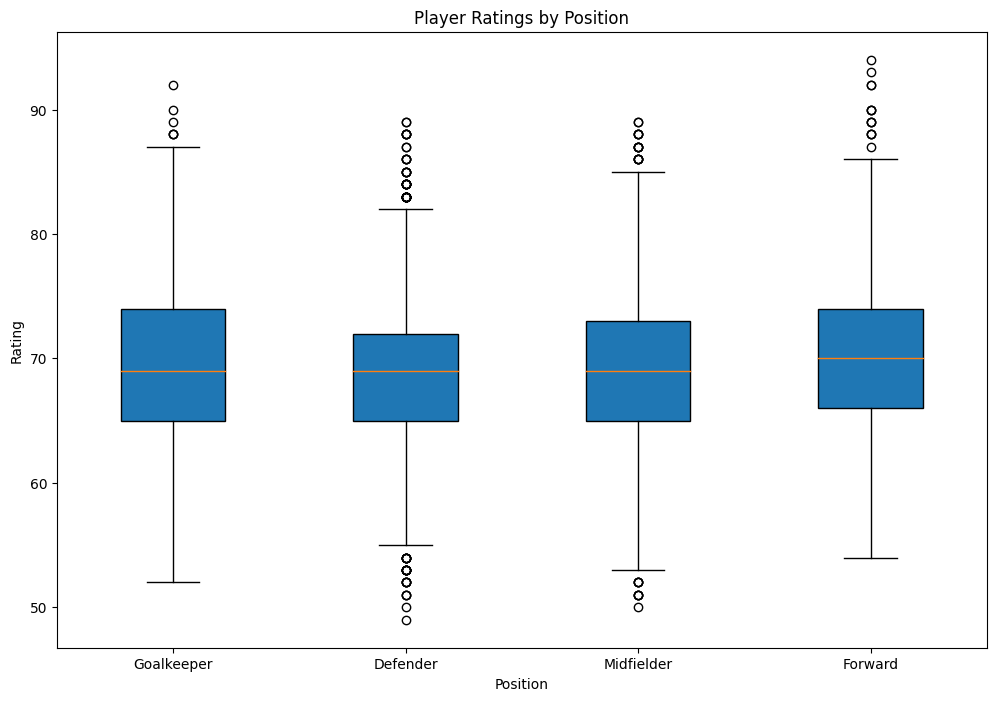

In [93]:
# Create a box plot for all positions in the same graph
plt.figure(figsize=(12, 8))
positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
data_to_plot = [filtered_df[filtered_df['Field_Pos'] == pos]['Rating'] for pos in positions]
plt.boxplot(data_to_plot, labels=positions, patch_artist=True)
# Set titles and labels
plt.title('Player Ratings by Position')
plt.ylabel('Rating')
plt.xlabel('Position')
# Show the plot
plt.show()

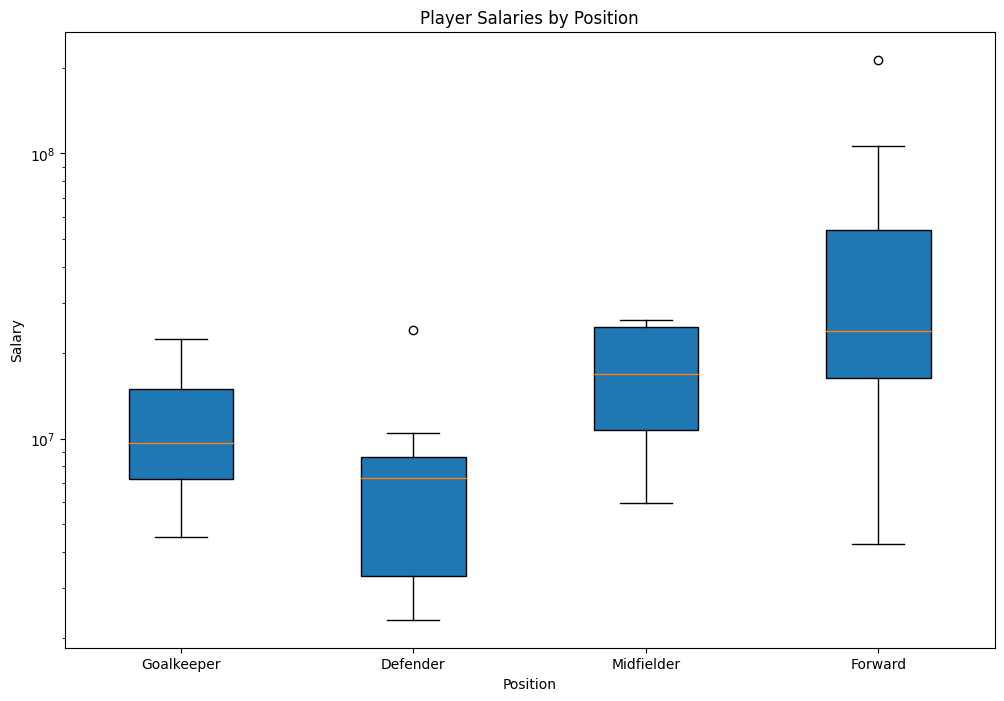

In [94]:
# Create a box plot for all positions in the same graph
plt.figure(figsize=(12, 8))
positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
data_to_plot = [top_players[top_players['Field_Pos'] == pos]['adjusted_money'] for pos in positions]
plt.boxplot(data_to_plot, labels=positions, patch_artist=True)
plt.yscale('log')
# Set titles and labels
plt.title('Player Salaries by Position')
plt.ylabel('Salary')
plt.xlabel('Position')
# Show the plot
plt.show()

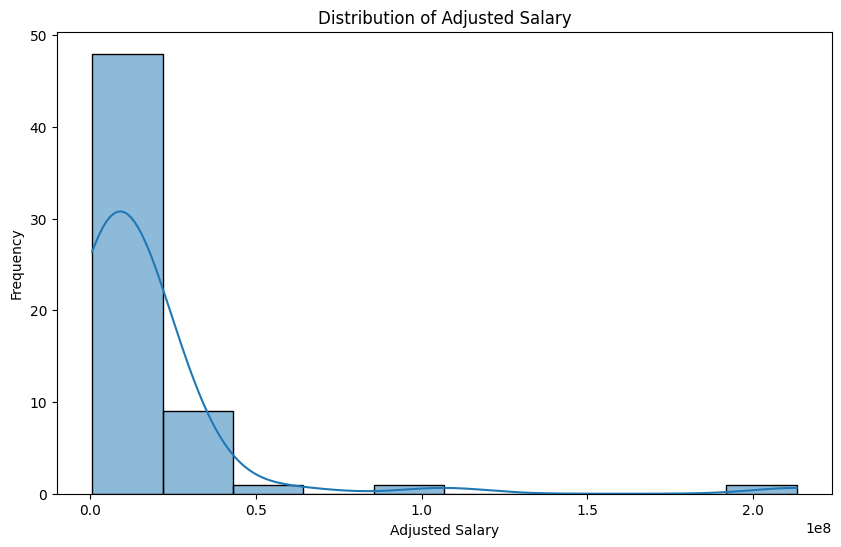

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(top_players['adjusted_money'], bins=10, kde=True)

# Set titles and labels
plt.title('Distribution of Adjusted Salary')
plt.xlabel('Adjusted Salary')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Correlation Matrix:
             Age    Height    Weight    Rating
Age     1.000000  0.076900  0.223489  0.458276
Height  0.076900  1.000000  0.758213  0.047070
Weight  0.223489  0.758213  1.000000  0.139766
Rating  0.458276  0.047070  0.139766  1.000000


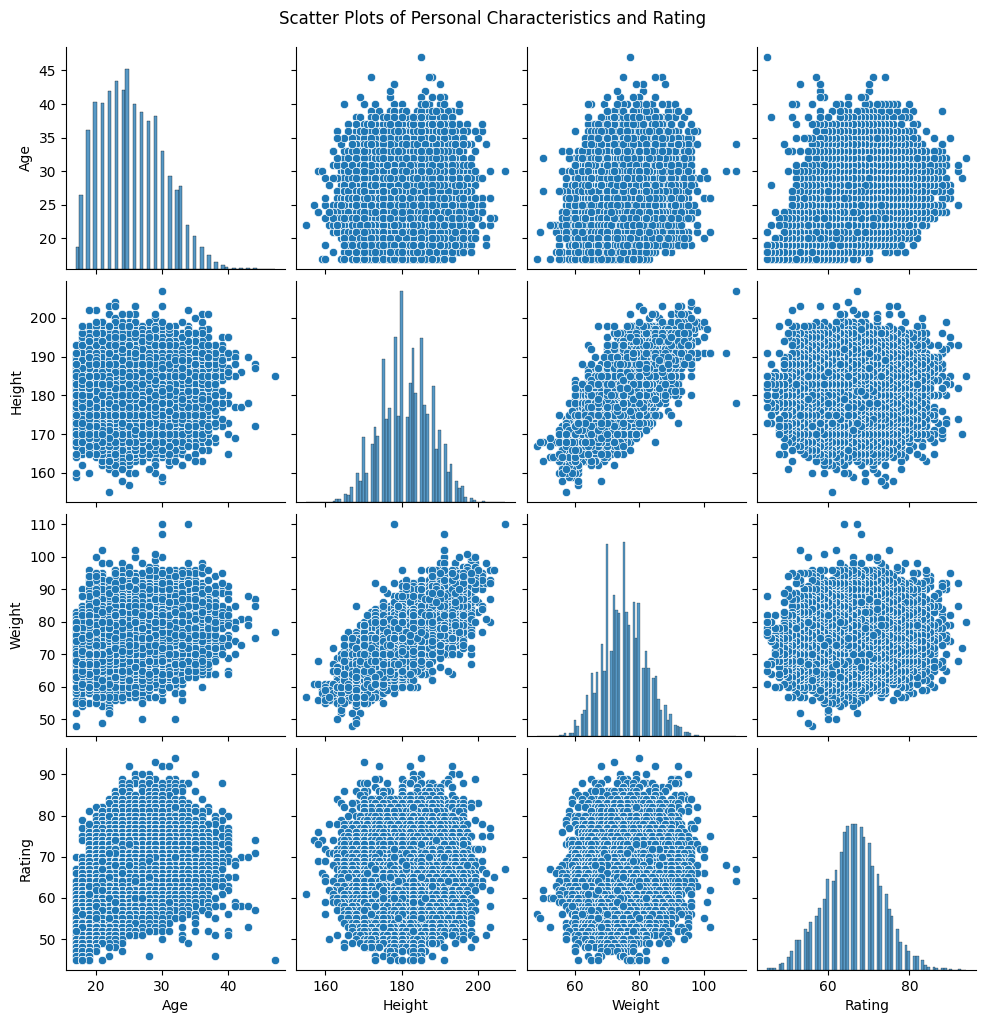

In [96]:
import seaborn as sns
# Select only the numerical columns
numerical_df = filtered_df.select_dtypes(include=['float64', 'int64'])
numerical_df = numerical_df.drop(columns=['Skill_Moves', 'Freekick_Accuracy', 'Dribbling', 'Speed', 'Stamina'])
correlation_matrix = numerical_df.corr()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Create pair plots
sns.pairplot(numerical_df)
# Set the title of the plot
plt.suptitle('Scatter Plots of Personal Characteristics and Rating', y=1.02)
# Show the plot
plt.show()

Correlation Matrix:
                     Rating  Freekick_Accuracy  Dribbling     Speed   Stamina
Rating             1.000000           0.399739   0.368629  0.224212  0.355279
Freekick_Accuracy  0.399739           1.000000   0.750012  0.462292  0.536998
Dribbling          0.368629           0.750012   1.000000  0.725688  0.676469
Speed              0.224212           0.462292   0.725688  1.000000  0.627496
Stamina            0.355279           0.536998   0.676469  0.627496  1.000000


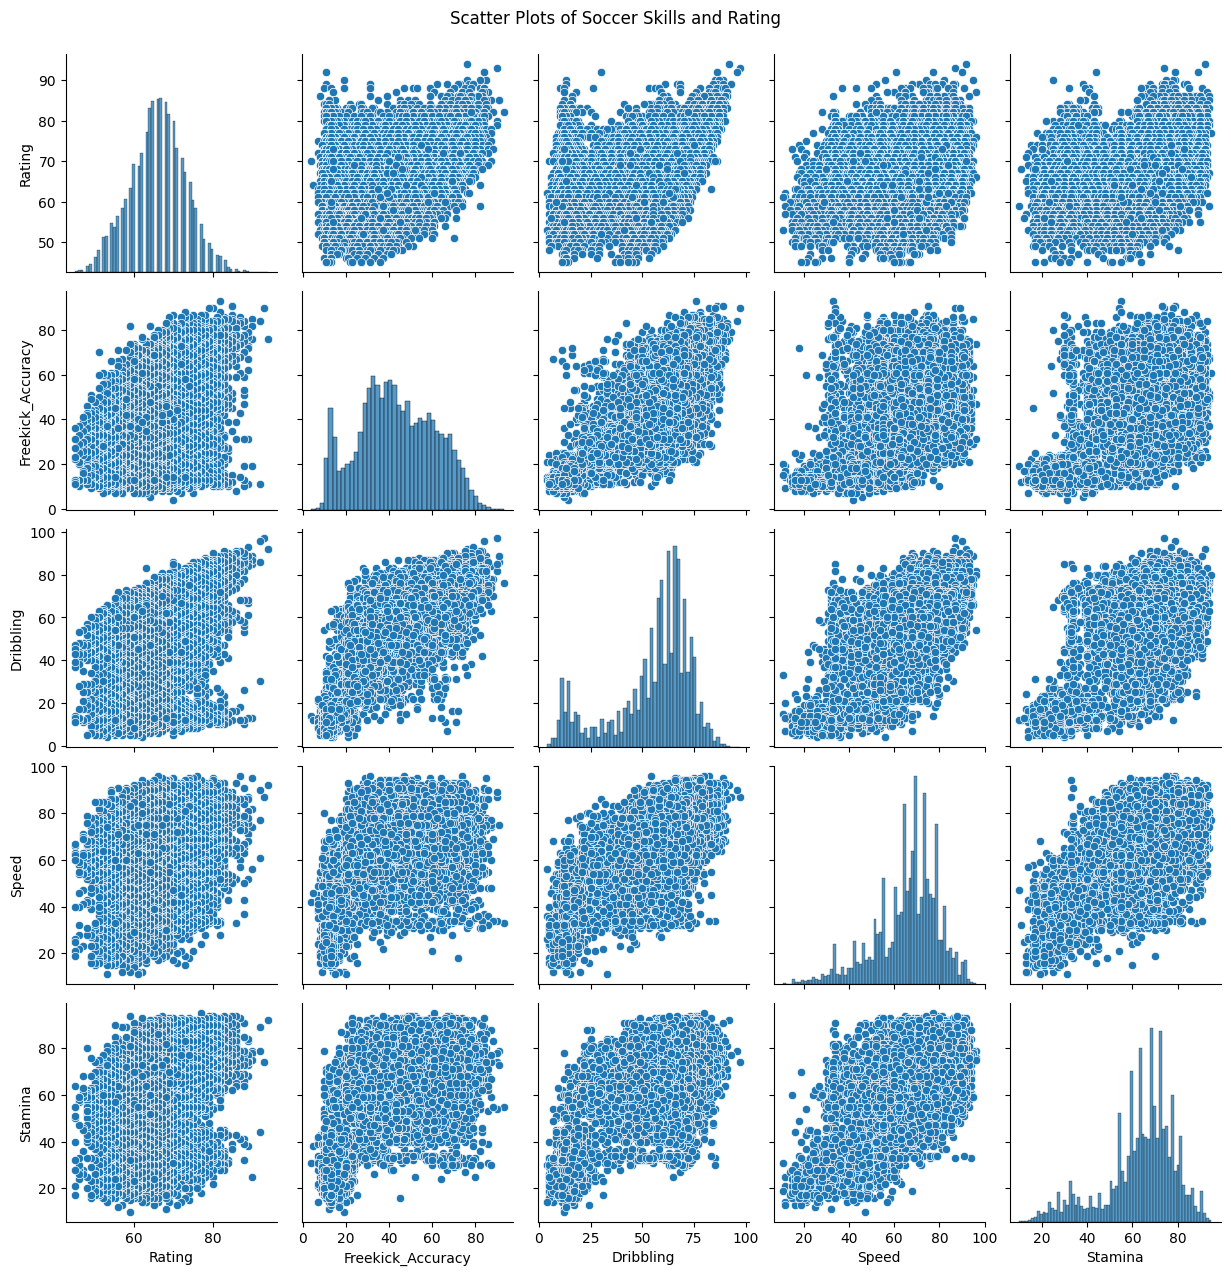

In [97]:
# Select only the numerical columns
numerical_df = filtered_df.select_dtypes(include=['float64', 'int64'])
numerical_df = numerical_df.drop(columns=['Skill_Moves', 'Age', 'Weight', 'Height'])
correlation_matrix = numerical_df.corr()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Create pair plots
sns.pairplot(numerical_df)
# Set the title of the plot
plt.suptitle('Scatter Plots of Soccer Skills and Rating', y=1.02)
# Show the plot
plt.show()

In [98]:
!pip install pulp
# 1 goalkeeper, 3 defenders, 4 midfielder, 3 forwards, 3 subtitute 1,000,000 1000000

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 42.9 MB/s eta 0:00:00


In [99]:
print(top_players['adjusted_money'].head(5))

Name
Thiago Silva         7086185
Sergio Ramos         2441471
Diego Godín          7533017
Mats Hummels         7463011
Giorgio Chiellini    3944734
Name: adjusted_money, dtype: int64


In [100]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger, value

# Function to calculate the best team within a given price point
def best_team_within_budget(df, budget):
    # Convert the 'adjusted_money' column to integers if not already done
    df['adjusted_money'] = df['adjusted_money'].apply(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)

    # Exclude "Reserve" players (!!!!!)
    df = df[df['Field_Pos'] != 'Reserve']

    # Define the LP problem
    prob = LpProblem("BestTeam", LpMaximize)

    # Define the decision variables
    player_vars = LpVariable.dicts("Player", df.index, cat='Binary')

    # Add a decision variable for the number of substitutes (go from 1-3 subs)
    num_substitutes = LpVariable("NumSubstitutes", 1, 3, LpInteger)

    # Set the objective function: maximize the total rating
    prob += lpSum([df.loc[i, 'Rating'] * player_vars[i] for i in df.index])

    # Add the budget constraint
    prob += lpSum([df.loc[i, 'adjusted_money'] * player_vars[i] for i in df.index]) <= budget

    # Add position constraints
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Goalkeeper']) == 1
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Defender']) == 3
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Midfielder']) == 4
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Forward']) == 3
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Substitute']) == num_substitutes

    # Solve the problem
    prob.solve()

    # Get the selected team
    selected_team = df.loc[[i for i in df.index if player_vars[i].varValue == 1]]

    # Return only the Field_Pos, Rating, and adjusted_money columns
    selected_team = selected_team[['Field_Pos', 'Rating', 'adjusted_money']]
    total_cost = selected_team['adjusted_money'].sum()
    total_rating = selected_team['Rating'].sum()
    num_subs = value(num_substitutes)

    return selected_team, total_cost, total_rating, num_subs

# Example usage
budget = 100000000  # Example budget

best_team, total_cost, total_rating, num_subs = best_team_within_budget(top_players, budget)

print(f"Best team within budget of {budget}:")
print(best_team)
print(f"Total cost: {total_cost}")
print(f"Total rating: {total_rating}")
print(f"Number of substitutes: {num_subs}")


Best team within budget of 100000000:
                     Field_Pos  Rating  adjusted_money
Name                                                  
Thiago Silva          Defender      89         7086185
Sergio Ramos          Defender      89         2441471
Pepe                  Defender      88         3070496
Gareth Bale            Forward      90        18892079
Zlatan Ibrahimović     Forward      90         4254511
Eden Hazard            Forward      89        11705833
De Gea              Goalkeeper      90         4509391
Paul Pogba          Midfielder      88        10938462
Iniesta             Midfielder      88        13369451
Arturo Vidal        Midfielder      87         5927763
David Silva         Midfielder      87        10307179
Jérôme Boateng      Substitute      89          740000
Claudio Marchisio   Substitute      86         1972367
Santi Cazorla       Substitute      86         3640000
Total cost: 98855188
Total rating: 1236
Number of substitutes: 3.0


In [101]:
# Calculate Rating_per_dollar and Overall_value
top_players['Rating_per_dollar'] = top_players['Rating'] / top_players['adjusted_money']
top_players['Overall_value'] = top_players['Rating_per_dollar'] * top_players['Rating']

# Sort by Overall_value in descending order
top_players_sorted = top_players.sort_values(by='Overall_value', ascending=False)

# # Print the resulting DataFrame
# print(top_players_sorted)

# If you want to return the sorted DataFrame as output
top_players_sorted

,Rank,Nationality,Club_Position,Field_Pos,Age,Height,Weight,Rating,Freekick_Accuracy,Dribbling,Speed,Stamina,Skill_Moves,adjusted_money,formatted_money,Rating_per_dollar,Overall_value
Name,,,,,,,,,,,,,,,,,
Martín Cáceres,7,Uruguay,Res,Reserve,29,180,78,81,41,60,83,75,2,500004,"500,004",1.619987e-04,0.013122
Jérôme Boateng,1,Germany,Sub,Substitute,28,192,90,89,31,67,81,75,2,740000,"740,000",1.202703e-04,0.010704
Paulinho,6,Brazil,Res,Reserve,28,182,77,81,57,77,78,92,3,714317,"714,317",1.133950e-04,0.009185
Willian,8,Brazil,Sub,Substitute,28,175,75,85,85,87,86,86,4,1051613,"1,051,613",8.082821e-05,0.006870
Claudio Marchisio,2,Italy,Sub,Substitute,31,180,75,86,78,84,79,83,4,1972367,"1,972,367",4.360243e-05,0.003750
Leonardo Bonucci,8,Italy,RCB,Defender,29,190,85,87,61,68,75,73,2,2313533,"2,313,533",3.760482e-05,0.003272
Sergio Ramos,2,Spain,LCB,Defender,31,183,75,89,67,61,78,84,3,2441471,"2,441,471",3.645343e-05,0.003244
Benoît Trémoulinas,8,France,Res,Reserve,31,172,65,81,59,75,82,87,2,2042604,"2,042,604",3.965526e-05,0.003212
Oscar,3,Brazil,Res,Reserve,25,179,67,83,77,82,77,76,4,2576795,"2,576,795",3.221056e-05,0.002673


In [102]:
# Assemble the best overall_val team (Walmart best team)
# Function to calculate the best overall value team within a given price point
def best_val_team_within_budget(df, budget):
    # Convert the 'adjusted_money' column to integers if not already done
    df['adjusted_money'] = df['adjusted_money'].apply(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)

    # Exclude "Reserve" players
    df = df[df['Field_Pos'] != 'Reserve']

    # Calculate Rating_per_dollar and Overall_value
    df['Rating_per_dollar'] = df['Rating'] / df['adjusted_money']
    df['Overall_value'] = df['Rating_per_dollar'] * df['Rating']

    # Define the LP problem
    prob = LpProblem("BestTeam", LpMaximize)

    # Define the decision variables
    player_vars = LpVariable.dicts("Player", df.index, cat='Binary')

    # Add a decision variable for the number of substitutes (go from 1-3 subs)
    num_substitutes = LpVariable("NumSubstitutes", 1, 3, LpInteger)

    # Set the objective function: maximize the total overall value
    prob += lpSum([df.loc[i, 'Overall_value'] * player_vars[i] for i in df.index])

    # Add the budget constraint
    prob += lpSum([df.loc[i, 'adjusted_money'] * player_vars[i] for i in df.index]) <= budget

    # Add position constraints
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Goalkeeper']) == 1
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Defender']) == 3
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Midfielder']) == 4
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Forward']) == 3
    prob += lpSum([player_vars[i] for i in df.index if df.loc[i, 'Field_Pos'] == 'Substitute']) == num_substitutes

    # Solve the problem
    prob.solve()

    # Get the selected team
    selected_team = df.loc[[i for i in df.index if player_vars[i].varValue == 1]]

    # Return only the Field_Pos, Rating, adjusted_money, Rating_per_dollar, and Overall_value columns
    selected_team = selected_team[['Field_Pos', 'Rating', 'adjusted_money', 'Overall_value']]
    total_cost = selected_team['adjusted_money'].sum()
    total_rating = selected_team['Rating'].sum()
    total_overall_value = selected_team['Overall_value'].sum()
    num_subs = value(num_substitutes)

    return selected_team, total_cost, total_rating, total_overall_value, num_subs

# Example usage
budget = 350000000  # Example budget

best_team, total_cost, total_rating, total_overall_value, num_subs = best_val_team_within_budget(top_players, budget)

print(f"Best overall_val team within budget of {budget}:")
print(best_team)
print(f"Total cost: {total_cost}")
print(f"Total rating: {total_rating}")
print(f"Total overall value: {total_overall_value}")
print(f"Number of substitutes: {num_subs}")

best_team2, total_cost2, total_rating2, num_subs2 = best_team_within_budget(top_players, budget)

print(f"Best Rating team within budget of {budget}:")
print(best_team2)
print(f"Total cost: {total_cost2}")
print(f"Total rating: {total_rating2}")
print(f"Number of substitutes: {num_subs2}")
# Save the results to CSV files
best_team.to_csv('best_overall_val_team.csv', index=False)
best_team2.to_csv('best_rating_team.csv', index=False)

Best overall_val team within budget of 350000000:
                     Field_Pos  Rating  adjusted_money  Overall_value
Name                                                                 
Sergio Ramos          Defender      89         2441471       0.003244
Pepe                  Defender      88         3070496       0.002522
Leonardo Bonucci      Defender      87         2313533       0.003272
Zlatan Ibrahimović     Forward      90         4254511       0.001904
Eden Hazard            Forward      89        11705833       0.000677
Gonzalo Higuaín        Forward      89        16323495       0.000485
De Gea              Goalkeeper      90         4509391       0.001796
Paul Pogba          Midfielder      88        10938462       0.000708
James Rodríguez     Midfielder      87        10600000       0.000714
Arturo Vidal        Midfielder      87         5927763       0.001277
David Silva         Midfielder      87        10307179       0.000734
Jérôme Boateng      Substitute      89  

<ipython-input-102-34a70ceffc9c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating_per_dollar'] = df['Rating'] / df['adjusted_money']
<ipython-input-102-34a70ceffc9c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall_value'] = df['Rating_per_dollar'] * df['Rating']
